<h1>Buisness Intelligence - Sheet 5</h1>
<h3> Camilo Andrés Vega Agudelo - 0000163913</h3>
<h3> Juan Felipe Herrera Rincon - 0000156342</h3>
<h3> Johan Nicolas Imbachi Nino - 0000179756 </h3>

In [110]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('./iris-dataset.csv')
species = iris.iloc[:, 4]
A = iris.drop('species', axis=1)
numpy_iris = A.to_numpy()
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [111]:
def getDistances(A):
    if type(A) == pd.DataFrame:
        A = A.to_numpy()
    n = A.shape[0]
    w = np.zeros((n, n))
    for i in range (n):
        for j in range (n):
            row1 = A[i, :]
            row2 = A[j, :]
            dist = np.linalg.norm(row1-row2)
            w[i,j] = dist
    return(w)
getDistances(numpy_iris)

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

<Axes3DSubplot:>

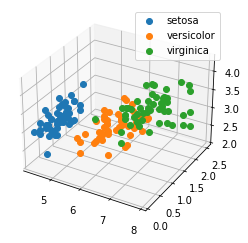

In [112]:
def plotClusters(A, C, dimX, dimY, dimZ = None, ax = None):
    labels = np.unique(C)
    if type(A) == pd.DataFrame:
        A = A.to_numpy()
    if dimZ == None:
        if ax == None:
            fig = plt.figure()
            ax = fig.add_subplot(111)
        for key in labels:
            test = A[C == key]
            ax.plot(test[:, dimX], test[:, dimY], 'o')
        ax.legend(labels)
            
    else:
        if ax == None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection = '3d')
        for key in labels:
            test = A[C == key]
            ax.plot(test[:, dimX], test[:, dimY], test[:, dimZ], 'o')
        ax.legend(labels)  
        
    return(ax)    
                
plotClusters(numpy_iris, species, 0, 3, 1)